In [2]:
%matplotlib inline
from collections import Counter

In [3]:
members = pd.read_csv("data/members_v3.csv")
train = pd.read_csv("data/train_v2.csv")
transactions = pd.read_csv("data/transactions_v2.csv")
user_logs = pd.read_csv("data/user_logs_v2.csv")
sample_submission = pd.read_csv("data/sample_submission_v2.csv")

In [4]:
members.shape, train.shape, transactions.shape, user_logs.shape

((6769473, 6), (970960, 2), (1431009, 9), (18396362, 9))

In [5]:
members_col = members.columns 
train_col = train.columns
transactions_col = transactions.columns
user_logs_col = user_logs.columns
print(members_col)
print(train_col)
print(transactions_col)
print(user_logs_col)

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'],
      dtype='object')
Index(['msno', 'is_churn'], dtype='object')
Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')
Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')


# Members.csv

### user information. Note that not every user in the dataset is available.
- msno
- city
- bd: age. Note: this column has outlier values ranging from -7000 to 2015, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

In [23]:
members.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [19]:
members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


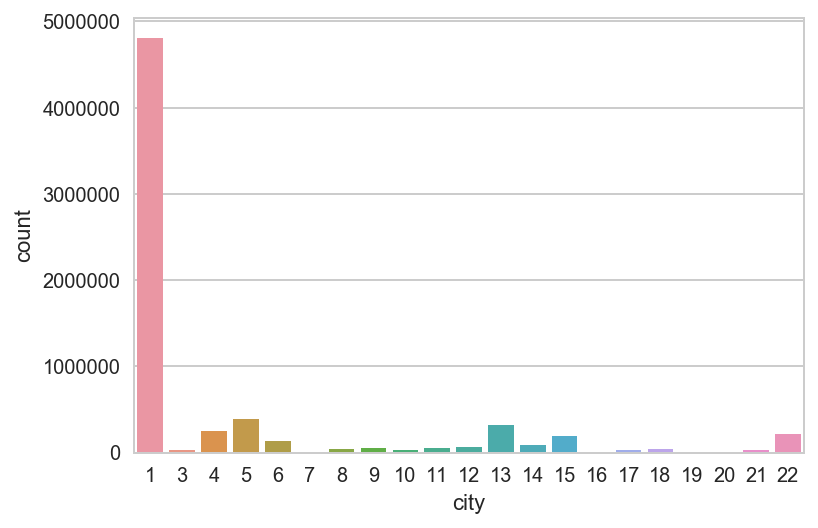

In [30]:
sns.countplot(x = 'city', data=members)

In [57]:
members['bd'].unique()

array([    0,    32,    30,    34,    19,    63,    18,    28,    29,
          31,    22,    23,    21,    27,    47,    38,    36,    26,
          58,    43,    33,    39,    24,    20,    25,    41,    17,
          54,    40,    45,    52,    56,    50,    35,    42,    49,
          44,    48,    57,    37,    51,    60,    46,    59,    53,
          16,    14,   104,    15,    64,    91,    69,    62,    55,
          61,    65,    75,   106,   108,    99,    68,    82,    95,
          90,    67,    96,    77,    66,   -39,     6,    76,   109,
          72,    13,    80,    93,     7,  1028,    94,   117,    70,
           4,   793,   105,   923,   107,   112,    73,    87,    88,
          86,    71,    81,    97,    85,    79,   102,   101,    78,
         111,     1,    89,    74,    84,   110,    98,  -518,   -51,
          12,    83,  1037,   103,   116,   100,    10,  1025,     5,
         220,    92,     9,   115,     8,  1039,  1052,  -506,   938,
          11,  -510,

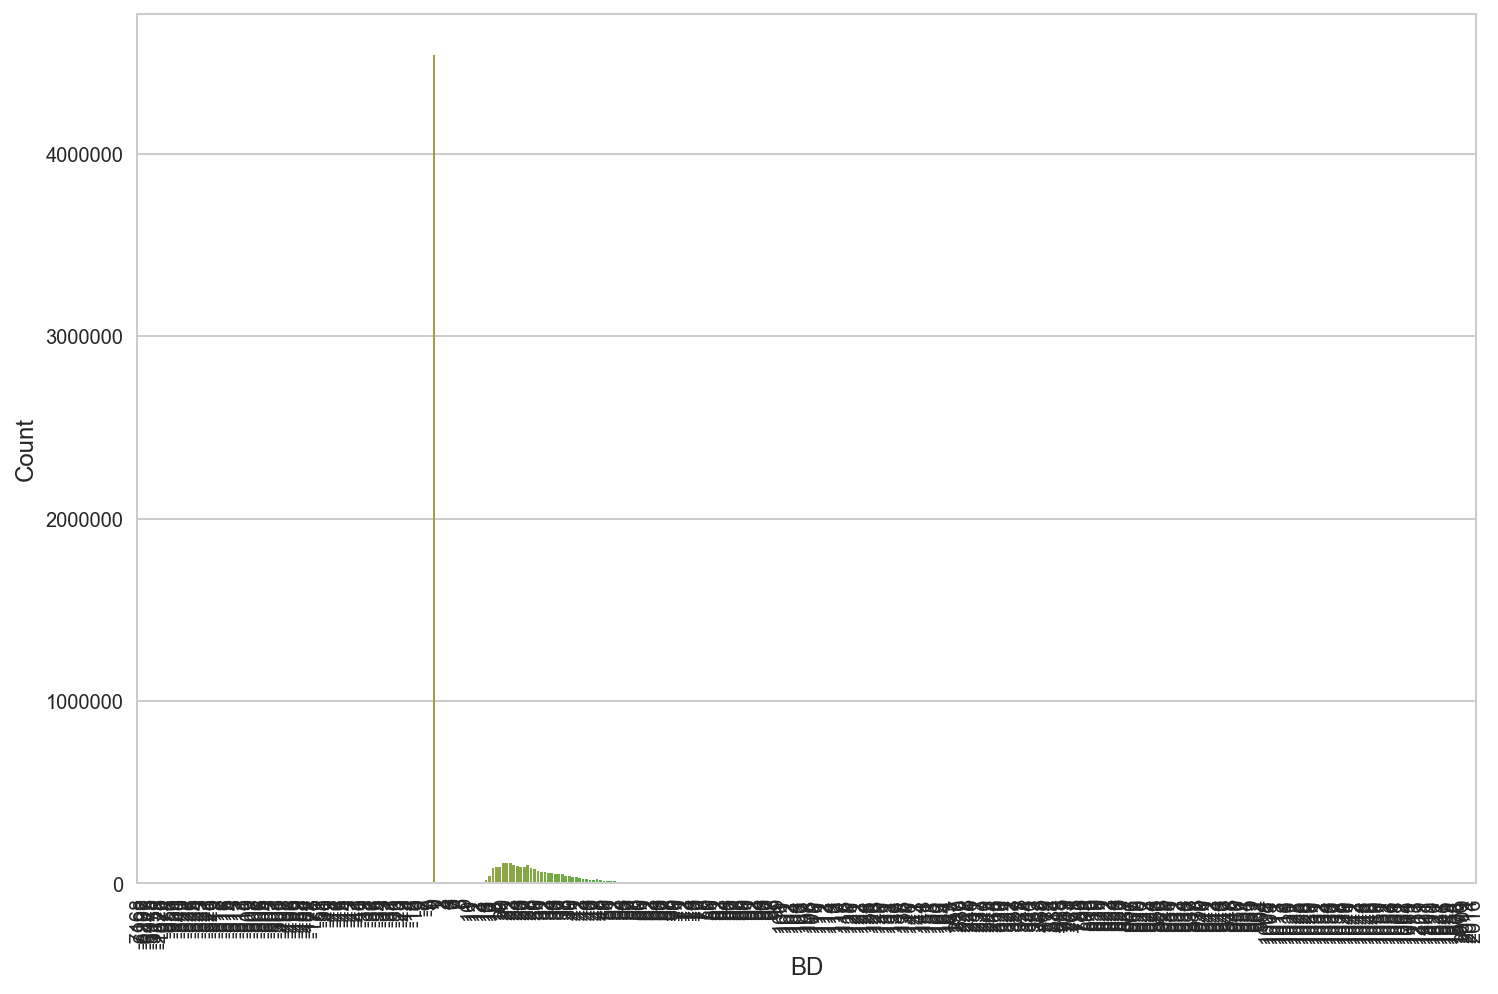

In [41]:
plt.figure(figsize=(12,8))
bd_order=members['bd'].unique()
bd_order = sorted(bd_order, key=lambda x: str(x))
bd_order = sorted(bd_order, key=lambda x: float(x))
sns.countplot(x = 'bd', data=members, order=bd_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
count = 0
for i in members['bd']:
    if i > 100:
        count = count + 1

print (count)

5377


In [49]:
bd_count = Counter(members['bd']).most_common()
print("BD Count " +str(bd_count))

BD Count [(0, 4540215), (22, 112200), (21, 110574), (20, 110452), (27, 102769), (23, 101500), (24, 97252), (26, 92433), (25, 91514), (19, 91374), (18, 90659), (28, 82722), (17, 82111), (29, 82026), (30, 70443), (32, 64607), (31, 62612), (33, 58559), (34, 55667), (37, 54381), (35, 53195), (36, 51415), (38, 42795), (16, 42778), (39, 38839), (40, 35420), (41, 33968), (42, 28354), (43, 25285), (44, 22998), (47, 22209), (45, 21401), (46, 20670), (48, 17091), (15, 16645), (49, 15697), (50, 13785), (51, 13134), (52, 11457), (53, 9494), (54, 8392), (55, 7259), (56, 6344), (57, 5901), (14, 5632), (58, 4581), (59, 4121), (60, 3441), (61, 3236), (62, 3066), (63, 2291), (64, 1861), (65, 1811), (67, 1713), (66, 1628), (112, 1309), (68, 1022), (69, 813), (13, 790), (106, 743), (70, 678), (72, 643), (71, 534), (73, 509), (103, 449), (117, 439), (102, 424), (74, 379), (95, 373), (94, 330), (97, 323), (104, 307), (75, 294), (101, 291), (107, 290), (76, 289), (77, 279), (111, 257), (93, 251), (96, 237),

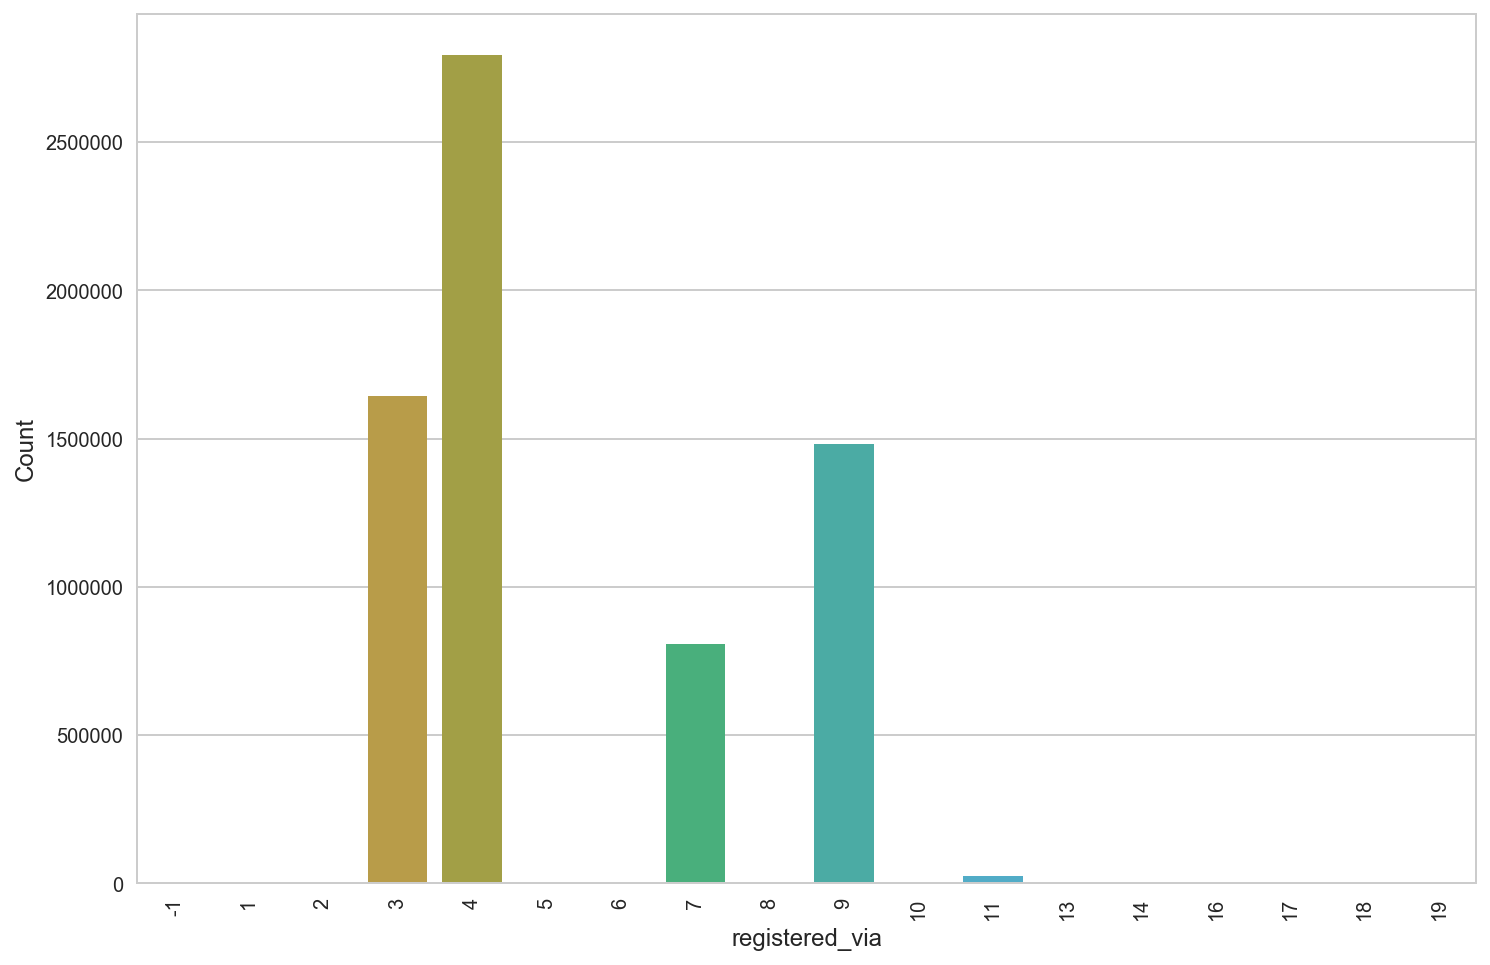

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'registered_via', data=members)
plt.ylabel('Count', fontsize=12)
plt.xlabel('registered_via', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

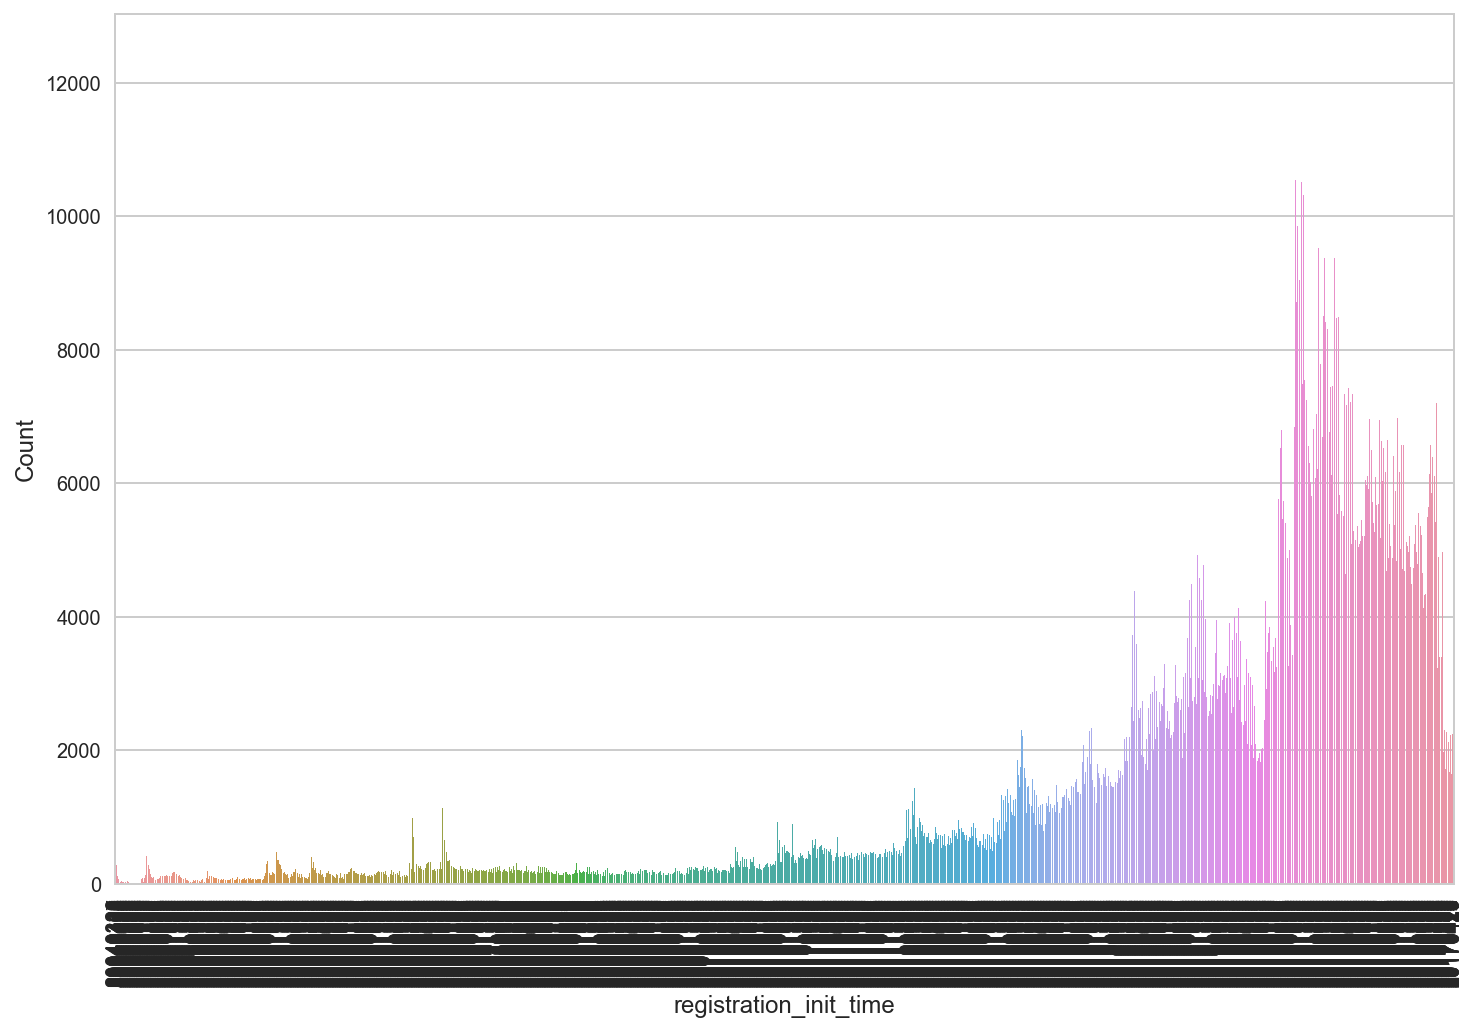

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'registration_init_time', data=members)
plt.ylabel('Count', fontsize=12)
plt.xlabel('registration_init_time', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
registration_init_time_count = Counter(members['registration_init_time']).most_common()
print("registration_init_time Count " +str(registration_init_time_count))

registration_init_time Count [(20151009, 12413), (20151010, 11537), (20151121, 11143), (20151107, 10959), (20151017, 10874), (20151011, 10547), (20160124, 10517), (20151101, 10515), (20151031, 10352), (20151108, 10320), (20160123, 10198), (20151122, 10044), (20151024, 9959), (20160109, 9900), (20160102, 9873), (20151128, 9861), (20151018, 9855), (20160116, 9704), (20151226, 9667), (20151114, 9659), (20151212, 9540), (20160101, 9525), (20151115, 9431), (20160130, 9413), (20160227, 9379), (20151205, 9376), (20160122, 9375), (20151219, 9134), (20151025, 9049), (20160228, 9021), (20151129, 8959), (20151227, 8957), (20160205, 8939), (20151220, 8835), (20160103, 8833), (20151213, 8806), (20160131, 8801), (20160110, 8791), (20160319, 8764), (20151106, 8734), (20151014, 8716), (20151206, 8674), (20160117, 8662), (20160121, 8628), (20151015, 8582), (20160119, 8513), (20160312, 8488), (20160305, 8473), (20160609, 8427), (20160126, 8412), (20160127, 8389), (20151230, 8353), (20160202, 8310), (201

# Train.csv

### the train set, containing the user ids and whether they have churned.
- msno: user id
- is_churn: This is the target variable. Churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means churn,is_churn = 0 means renewal.

In [21]:
train.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [9]:
churn = 0
no_churn = 0
for i in train['is_churn']:
    if i==1:
        churn += 1
    else:
        no_churn += 1

print(churn)
print(no_churn)

87330
883630


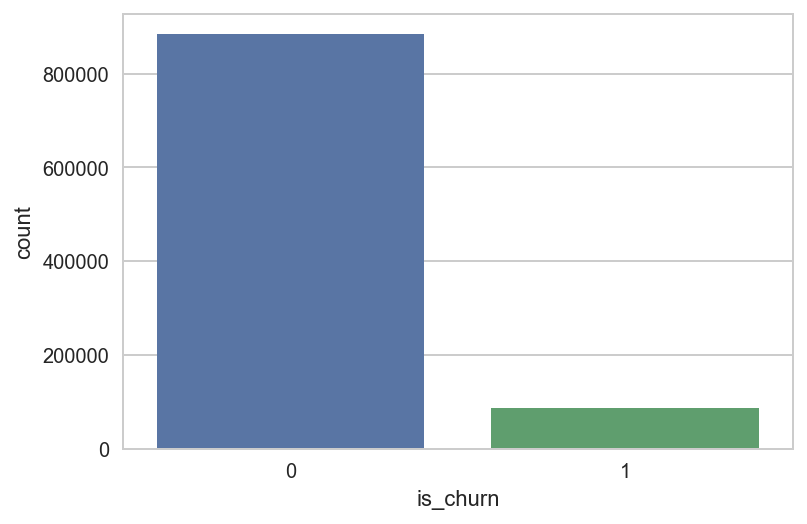

In [11]:
sns.countplot(x="is_churn", data=train)
plt.show()

# Transactions.csv

### transactions of users up until 2/28/2017.
- msno: user id
- payment_method_id: payment method
- payment_plan_days: length of membership plan in days
- plan_list_price: in New Taiwan Dollar (NTD)
- actual_amount_paid: in New Taiwan Dollar (NTD)
- is_auto_renew
- transaction_date: format %Y%m%d
- membership_expire_date: format %Y%m%d
- is_cancel: whether or not the user canceled the membership in this transaction.

train에 있는 id만 남기고, 각자 파일에서 중복제거하고, 합침

In [17]:
count = 0
for i in transactions['is_cancel']:
    if i == 1:
        count += 1
count

35133

In [10]:
transactions.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [23]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.016848e+07,2.017110e+07,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,4.858797e+03,3.032367e+03,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.016042e+07,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.017023e+07,2.017041e+07,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017031e+07,2.017042e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017032e+07,2.017050e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [24]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


#### payment_method_id count in transactions Data Set

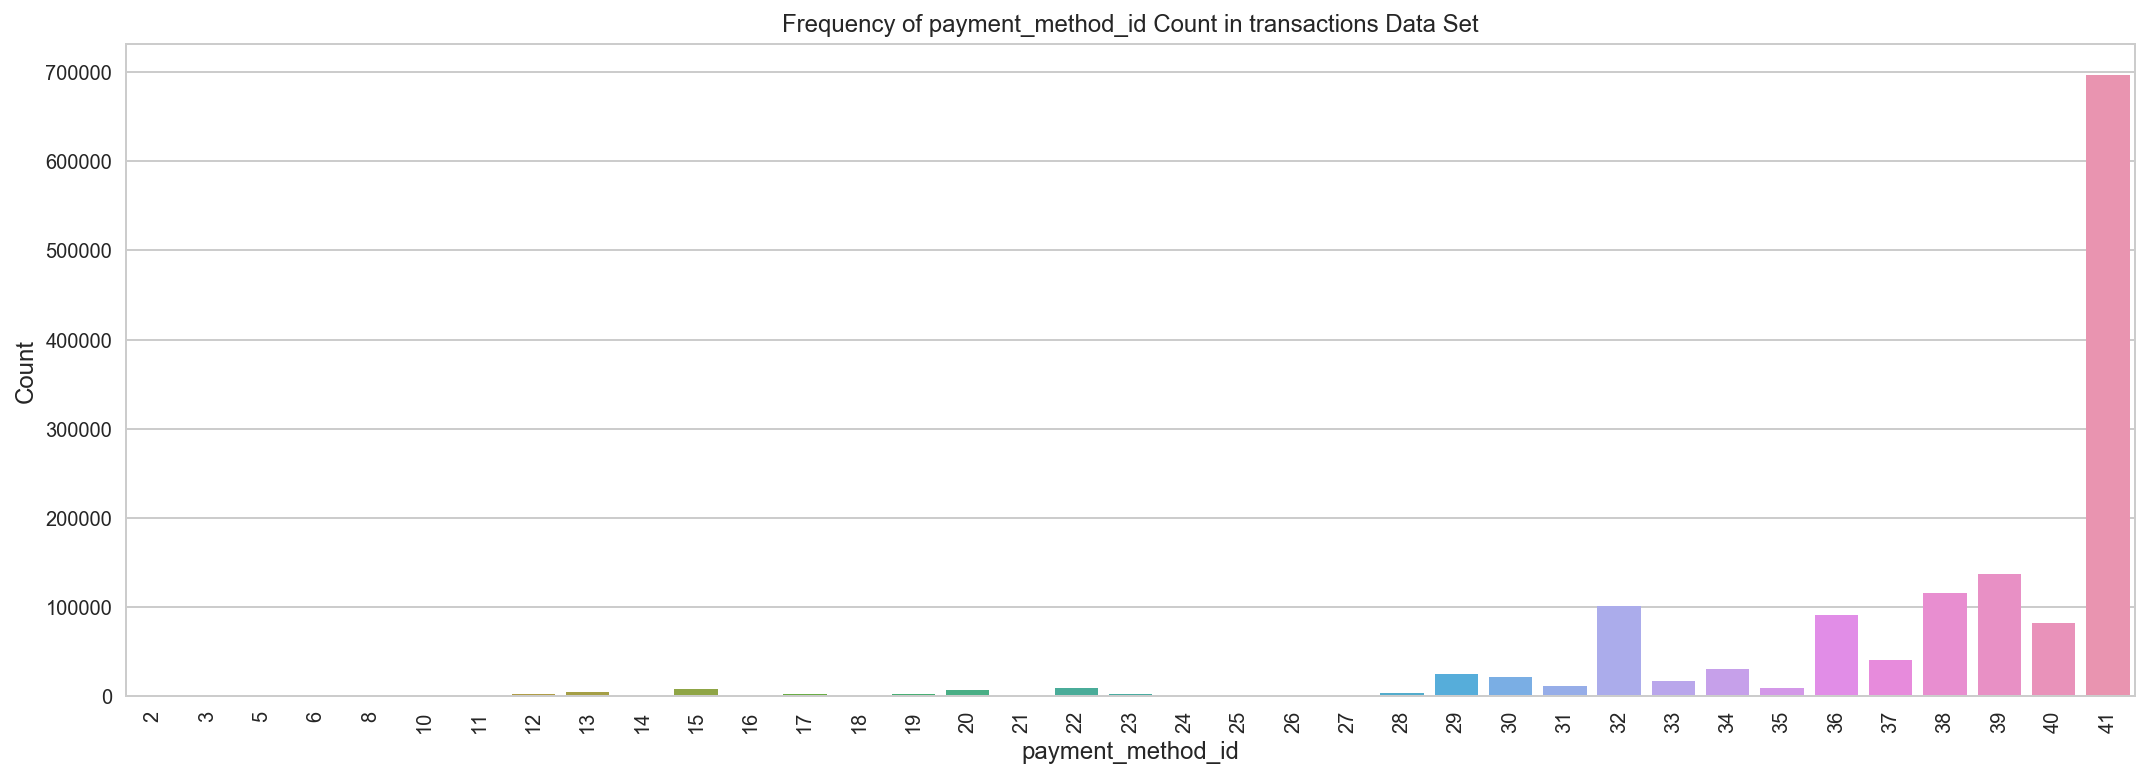

In [34]:
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()

In [35]:
payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

payment_method_id Count [(41, 696696), (39, 137120), (38, 115875), (32, 100982), (36, 90844), (40, 82747), (37, 40414), (34, 31099), (29, 24957), (30, 21182), (33, 16715), (31, 11597), (35, 9759), (22, 9563), (15, 7705), (20, 6651), (13, 5050), (28, 3452), (12, 2858), (23, 2719), (17, 2532), (19, 2136), (27, 2074), (21, 1846), (16, 1842), (18, 714), (14, 672), (26, 668), (6, 186), (8, 179), (11, 79), (3, 42), (10, 40), (25, 5), (24, 4), (2, 4), (5, 1)]


#### payment_plan_days count in transactions Data Set

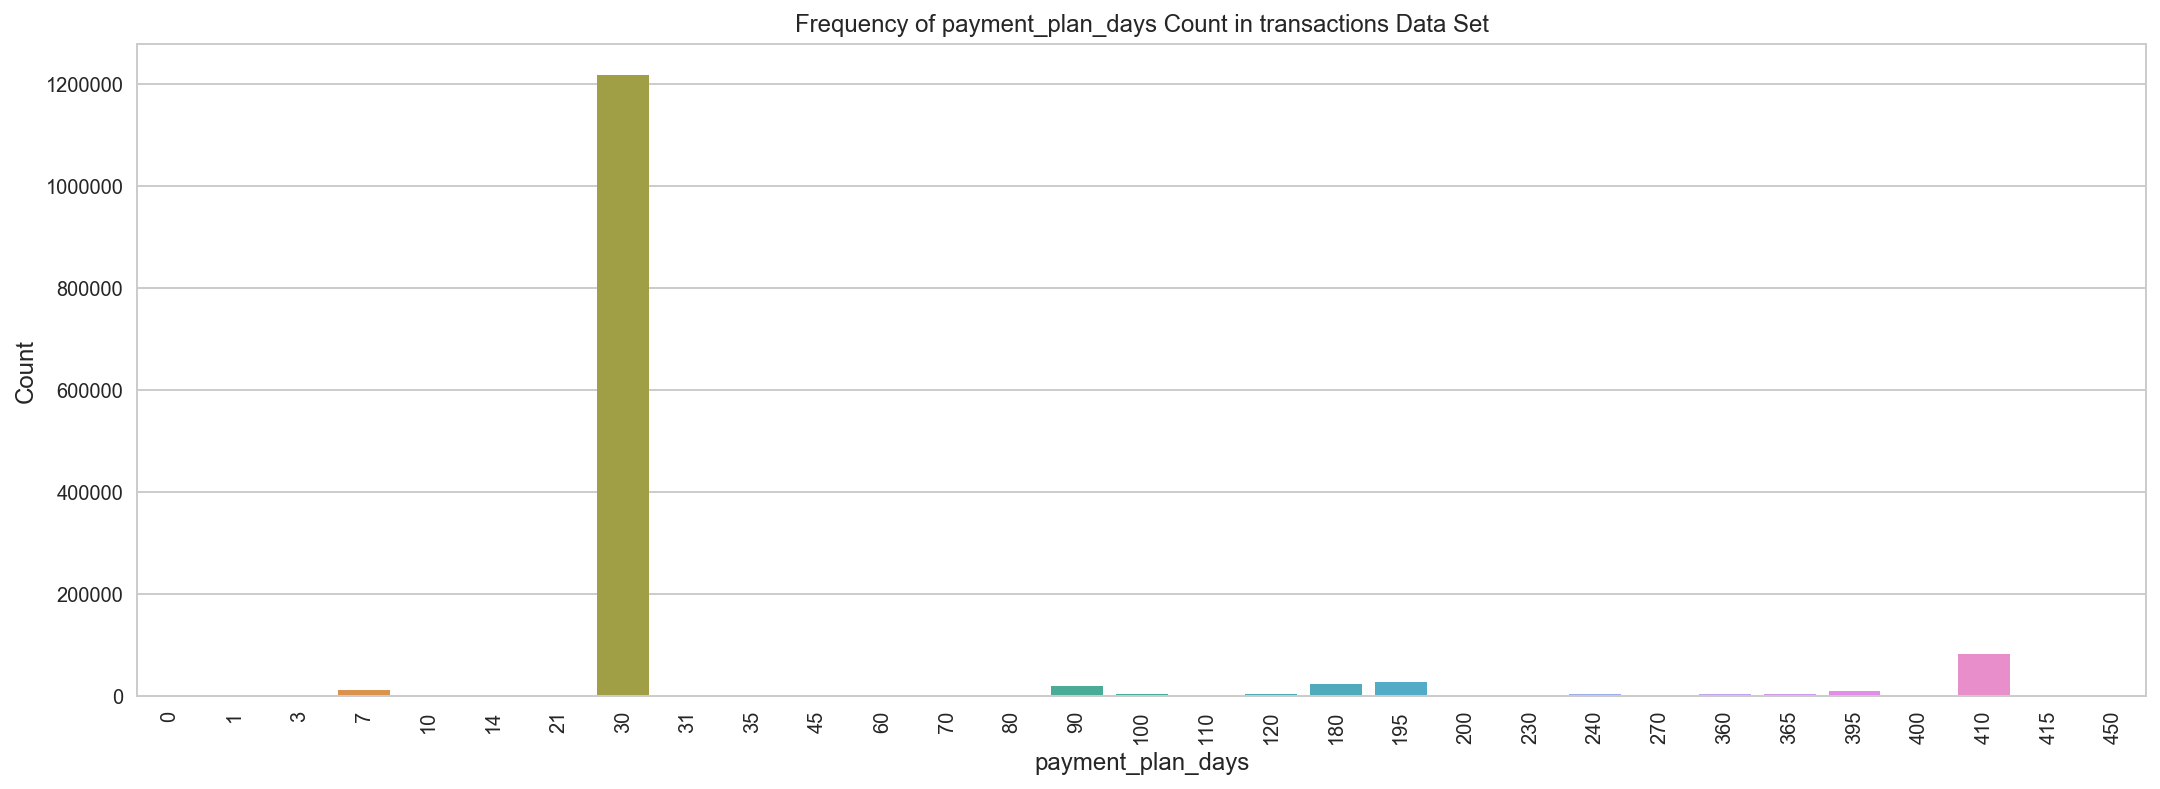

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()

In [33]:
payment_plan_days_count = Counter(transactions['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))

payment_plan_days Count [(30, 1217998), (410, 82097), (195, 28568), (180, 23900), (90, 19130), (7, 12168), (395, 9753), (360, 4658), (100, 4098), (365, 3838), (120, 3612), (240, 3440), (415, 3298), (60, 3134), (200, 3108), (0, 2218), (400, 1817), (450, 1762), (270, 997), (1, 676), (10, 416), (14, 82), (70, 49), (80, 43), (45, 41), (230, 35), (35, 29), (110, 20), (21, 11), (3, 9), (31, 4)]


#### plan_list_price count in transactions Data Set

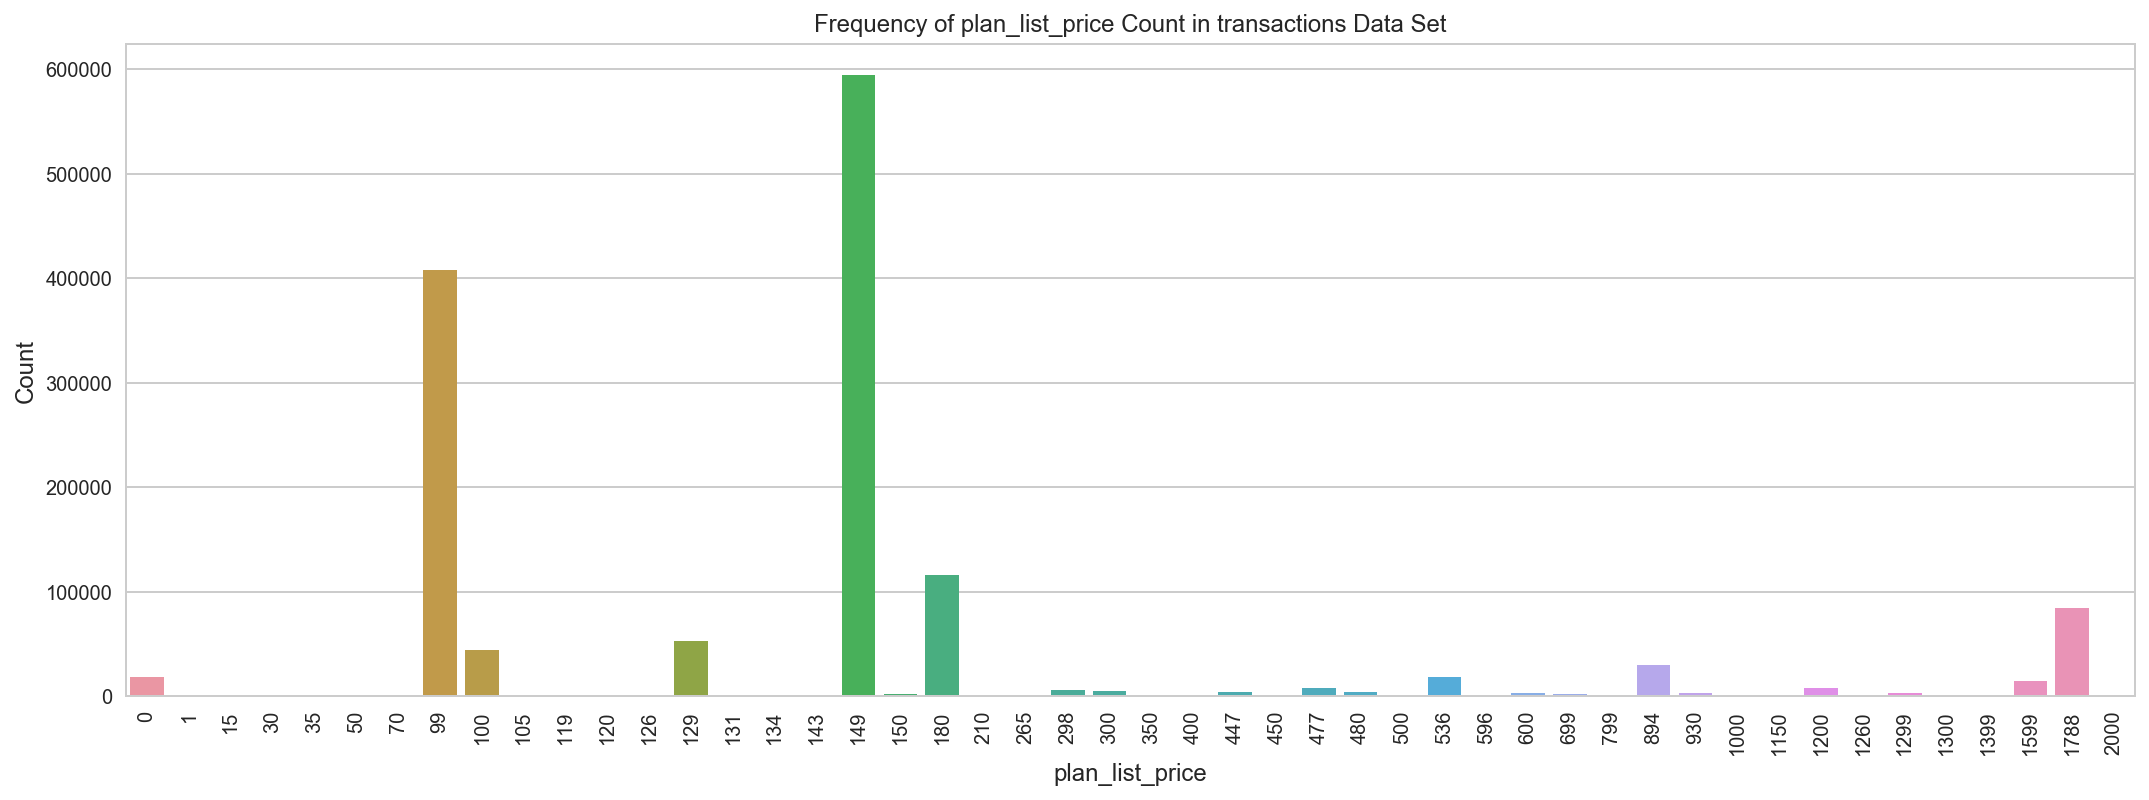

In [30]:
plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()

In [31]:
plan_list_price_count = Counter(transactions['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

plan_list_price Count [(149, 594395), (99, 407750), (180, 115660), (1788, 83963), (129, 52986), (100, 43873), (894, 29677), (0, 18413), (536, 18335), (1599, 14727), (477, 7891), (1200, 7603), (298, 6049), (300, 4782), (447, 4041), (480, 3857), (1299, 3052), (930, 2796), (600, 2729), (150, 2144), (699, 2126), (799, 1434), (119, 527), (35, 322), (1000, 303), (120, 275), (450, 264), (500, 241), (1399, 137), (2000, 130), (134, 109), (596, 66), (210, 65), (350, 49), (126, 46), (400, 43), (1150, 35), (1, 25), (1260, 25), (131, 24), (70, 11), (105, 11), (1300, 6), (265, 4), (143, 4), (50, 2), (30, 1), (15, 1)]


#### actual_amount_paid count in transactions Data Set

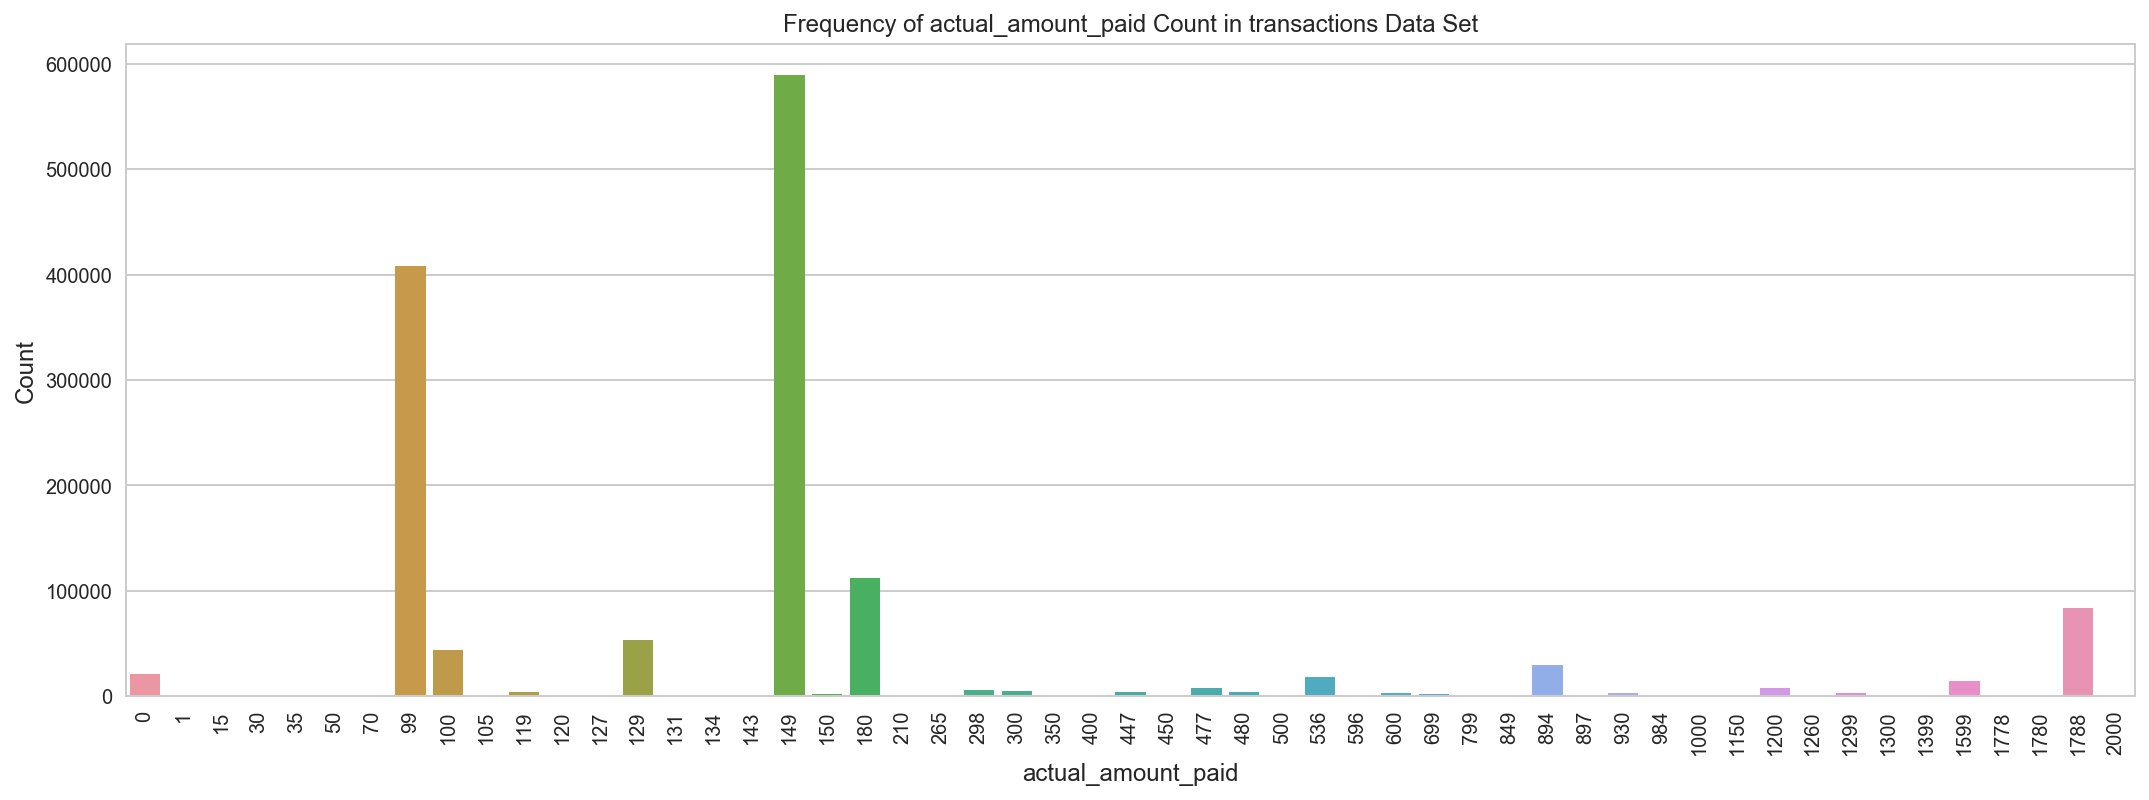

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x="actual_amount_paid", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('actual_amount_paid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of actual_amount_paid Count in transactions Data Set", fontsize=12)
plt.show()

In [29]:
actual_amount_paid_count = Counter(transactions['actual_amount_paid']).most_common()
print("actual_amount_paid Count " +str(actual_amount_paid_count))

actual_amount_paid Count [(149, 589691), (99, 408561), (180, 112512), (1788, 83980), (129, 53410), (100, 43893), (894, 29674), (0, 21448), (536, 18335), (1599, 14719), (477, 7891), (1200, 7608), (298, 6049), (300, 4782), (119, 4103), (447, 4047), (480, 3857), (1299, 3052), (930, 2796), (600, 2729), (150, 2143), (699, 2126), (799, 1434), (35, 322), (1000, 303), (450, 264), (500, 241), (120, 225), (1399, 137), (2000, 130), (134, 109), (596, 81), (210, 65), (350, 49), (127, 46), (400, 43), (1150, 35), (1, 25), (1260, 25), (131, 24), (70, 11), (105, 11), (1300, 6), (265, 4), (143, 4), (50, 2), (849, 1), (1778, 1), (1780, 1), (30, 1), (984, 1), (15, 1), (897, 1)]


#### is_auto_renew count in transactions Data set

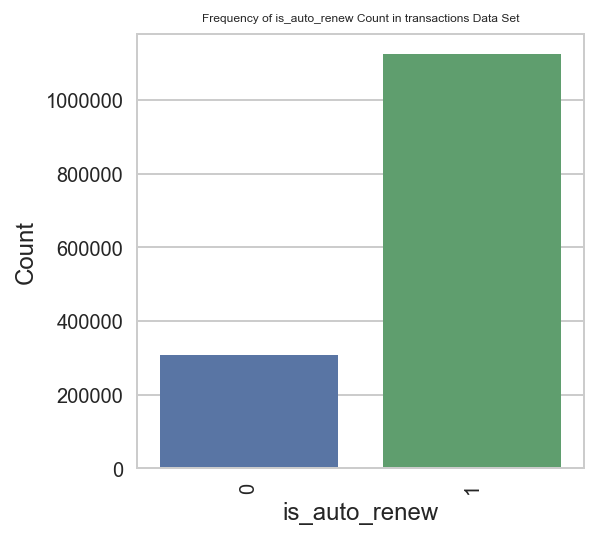

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_auto_renew Count in transactions Data Set", fontsize=6)
plt.show()

In [27]:
is_auto_renew_count = Counter(transactions['is_auto_renew']).most_common()
print("is_auto_renew Count " +str(is_auto_renew_count))

is_auto_renew Count [(1, 1123775), (0, 307234)]


#### is_calcel_count in transactions Data set

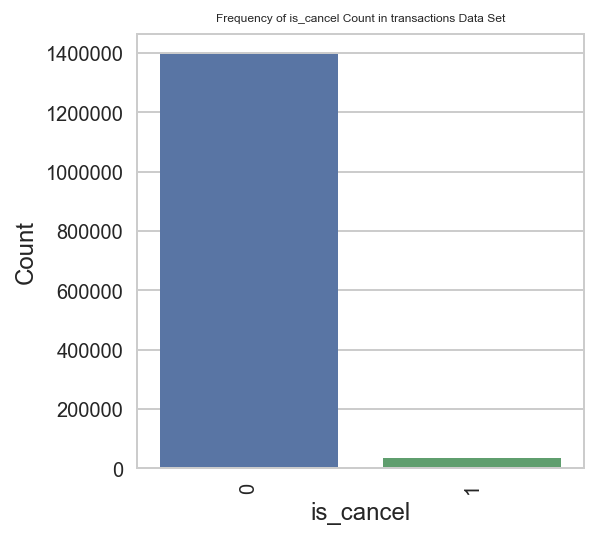

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_cancel Count in transactions Data Set", fontsize=6)
plt.show()

In [38]:
is_cancel_count = Counter(transactions['is_cancel']).most_common()
print("is_cancel Count " +str(is_cancel_count))

is_cancel Count [(0, 1395876), (1, 35133)]


# User_logs.csv

### daily user logs describing listening behaviors of a user. Data collected until 2/28/2017.
- msno: user id
- date: format %Y%m%d
- num_25: # of songs played less than 25% of the song length
- num_50: # of songs played between 25% to 50% of the song length
- num_75: # of songs played between 50% to 75% of of the song length
- num_985: # of songs played between 75% to 98.5% of the song length
- num_100: # of songs played over 98.5% of the song length
- num_unq: # of unique songs played
- total_secs: total seconds played

In [25]:
user_logs.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [26]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [8]:
len(user_logs['msno'].unique())

1103894